In [11]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Training points are every 0.1 in [0,1] (note that they're the same for both tasks)
train_x = torch.linspace(0, 1, 11).view(-1, 1)
# y1s are indexed 0, y2s are indexed 1
y1_inds = torch.zeros(11).long()
y2_inds = torch.ones(11).long()
# y1 function is sin(2*pi*x) with noise N(0, 0.04)
train_y1 = torch.sin(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2
# y2 function is cos(2*pi*x) with noise N(0, 0.04)
train_y2 = torch.cos(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2

In [13]:
from torch import optim

In [14]:
train_y = torch.cat((train_y1, train_y2), dim=1).contiguous()
print(train_y)

tensor([[ 0.1524,  1.1455],
        [ 0.3357,  0.5691],
        [ 1.0402,  0.5352],
        [ 1.0873, -0.3835],
        [ 0.2822, -0.7345],
        [-0.3020, -1.0019],
        [-0.9858, -0.8136],
        [-1.0112, -0.4240],
        [-0.7563,  0.4080],
        [-0.6490,  0.7804],
        [-0.0232,  0.9867]])


In [15]:
from multitaskgp import ExactMultitaskGP
from kernels import RQ_Constant, RBF

In [29]:
model = ExactMultitaskGP(train_x,train_y, kernel=RBF(), rank=1)

In [30]:
model.fit(lr=0.1, max_epoch=100)

Epoch: 1, Loss: 29.261871337890625
Epoch: 2, Loss: 28.477893829345703
Epoch: 3, Loss: 27.778697967529297
Epoch: 4, Loss: 27.171968460083008
Epoch: 5, Loss: 26.64958381652832
Epoch: 6, Loss: 26.19292640686035
Epoch: 7, Loss: 25.790021896362305
Epoch: 8, Loss: 25.431522369384766
Epoch: 9, Loss: 25.110889434814453
Epoch: 10, Loss: 24.83036231994629
Epoch: 11, Loss: 24.59876823425293
Epoch: 12, Loss: 24.417221069335938
Epoch: 13, Loss: 24.276378631591797
Epoch: 14, Loss: 24.156536102294922
Epoch: 15, Loss: 24.032814025878906
Epoch: 16, Loss: 23.882102966308594
Epoch: 17, Loss: 23.686447143554688
Epoch: 18, Loss: 23.433177947998047
Epoch: 19, Loss: 23.11285400390625
Epoch: 20, Loss: 22.720951080322266
Epoch: 21, Loss: 22.266014099121094
Epoch: 22, Loss: 21.780805587768555
Epoch: 23, Loss: 21.325397491455078
Epoch: 24, Loss: 20.965946197509766
Epoch: 25, Loss: 20.726146697998047
Epoch: 26, Loss: 20.558605194091797
Epoch: 27, Loss: 20.400550842285156
Epoch: 28, Loss: 20.218387603759766
Epoch:

In [31]:
test_x = torch.linspace(0, 1, 51).view(-1, 1)
fmean = model.predict(test_x)[-1]

In [32]:
print(fmean)

tensor([[ 0.0963,  1.0190],
        [ 0.1695,  0.9859],
        [ 0.2516,  0.9437],
        [ 0.3408,  0.8927],
        [ 0.4349,  0.8330],
        [ 0.5311,  0.7648],
        [ 0.6263,  0.6885],
        [ 0.7172,  0.6046],
        [ 0.8005,  0.5137],
        [ 0.8726,  0.4163],
        [ 0.9303,  0.3134],
        [ 0.9710,  0.2057],
        [ 0.9920,  0.0946],
        [ 0.9918, -0.0190],
        [ 0.9692, -0.1335],
        [ 0.9241, -0.2474],
        [ 0.8568, -0.3592],
        [ 0.7687, -0.4671],
        [ 0.6618, -0.5694],
        [ 0.5388, -0.6642],
        [ 0.4028, -0.7499],
        [ 0.2574, -0.8248],
        [ 0.1063, -0.8872],
        [-0.0465, -0.9359],
        [-0.1974, -0.9696],
        [-0.3427, -0.9875],
        [-0.4792, -0.9889],
        [-0.6043, -0.9735],
        [-0.7156, -0.9414],
        [-0.8114, -0.8929],
        [-0.8908, -0.8288],
        [-0.9529, -0.7502],
        [-0.9979, -0.6585],
        [-1.0260, -0.5554],
        [-1.0381, -0.4427],
        [-1.0352, -0

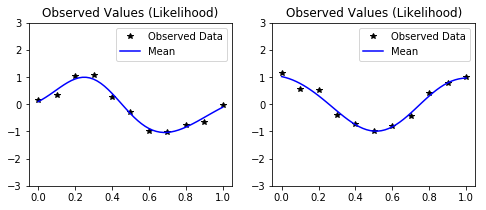

In [33]:
f, (y1_ax, y2_ax) = plt.subplots(1, 2, figsize=(8, 3))
def ax_plot(ax, train_y, rand_var, title):
    # Plot training data as black stars
    ax.plot(train_x.data.numpy(), train_y.data.numpy(), 'k*')
    # Predictive mean as blue line
    ax.plot(test_x.data.numpy(), rand_var.detach().numpy(), 'b')
    # Shade in confidence 
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])
    ax.set_title(title)
ax_plot(y1_ax, train_y1, fmean[:, 0], 'Observed Values (Likelihood)')
ax_plot(y2_ax, train_y2, fmean[:, 1], 'Observed Values (Likelihood)')

In [34]:
print(model.task_kernel())

tensor([[ 3.3537,  0.4436],
        [ 0.4436,  3.2151]])


In [35]:
print(model.log_noise.exp())

tensor(1.00000e-02 *
       [ 2.7244,  2.8059])
